<a href="https://colab.research.google.com/github/krishnaaxo/Rev.Conf/blob/main/BERT%2BMULTI2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/krishnaaxo/Rev.Conf/main/2018_iclr.csv
!wget https://raw.githubusercontent.com/krishnaaxo/Rev.Conf/main/2019_iclr.csv
!wget https://raw.githubusercontent.com/krishnaaxo/Rev.Conf/main/2021_iclr.csv

--2022-02-27 12:11:44--  https://raw.githubusercontent.com/krishnaaxo/Rev.Conf/main/2018_iclr.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7596883 (7.2M) [text/plain]
Saving to: ‘2018_iclr.csv’

2018_iclr.csv       100%[===================>]   7.24M  --.-KB/s    in 0.06s   

2022-02-27 12:11:44 (119 MB/s) - ‘2018_iclr.csv’ saved [7596883/7596883]

--2022-02-27 12:11:45--  https://raw.githubusercontent.com/krishnaaxo/Rev.Conf/main/2019_iclr.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13121594 (13M) [text/plain]
Savin

In [2]:
!pip install transformers

     |████████████████████████████████| 3.5 MB 8.5 MB/s 
     |████████████████████████████████| 596 kB 66.2 MB/s 
     |████████████████████████████████| 67 kB 6.4 MB/s 
     |████████████████████████████████| 895 kB 67.3 MB/s 
     |████████████████████████████████| 6.8 MB 54.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
import numpy as np
import pandas as pd

In [4]:
!pip install -U sentence-transformers

     |████████████████████████████████| 79 kB 5.2 MB/s 
     |████████████████████████████████| 1.2 MB 15.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=ef7ad07174172d7727f2d70b6b298d5e8d0102c9c7ef48b7078f4e7a24a559af
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers


In [5]:

from sentence_transformers import SentenceTransformer

In [6]:
import torch

In [7]:
from tqdm import tqdm
import nltk
nltk.download('punkt')
from nltk import tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import model_selection
from matplotlib import pyplot
import seaborn as sns
def metrics(expected , predicted):
  # Mean absolute error
  print("The rmse is " + str(np.sqrt(mean_squared_error(expected, predicted))))
  print("The mae is " + str(mean_absolute_error(expected, predicted)))
  print("The r2 is " + str(r2_score(expected, predicted)))
  print("Standard Deviation of predicted" + str(np.std(predicted)))
  plt.figure()
  ax1 = sns.distplot(predicted)
  ax2 = sns.distplot(expected)
  plt.axvline(np.mean(predicted) , color='b' , linestyle='dashed' , linewidth='2')
  plt.axvline(np.mean(expected) , color='orange' , linestyle='dashed' , linewidth='2')
  # pyplot.plot(err)
  # pyplot.xticks(ticks=[i for i in range(len(err))], labels=predicted)
  # pyplot.xlabel('Predicted Value')
  # pyplot.ylabel('Mean Squared Error')
  # pyplot.show()
  # mean sq error
  # r2

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
import transformers

In [12]:
df = pd.read_csv('2019_iclr.csv')
df['confidence'] = df['confidence'].astype(str).str[0]
df['review'] = df['review']
review = df[['confidence','review']]
review = review.dropna(axis=0)

In [13]:
review['confidence'] = review['confidence'].astype(int) -1 

In [14]:
reviews = list(review['review'])

In [15]:
def preprocess_text(sen):
    # Removing html tags
#     sentence = remove_tags(sen)
#     print(type(sen))
#     # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    
    sentence = re.sub(r'\n+', ' ', sentence)
    return sentence

In [16]:
import regex as re
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [17]:
sentences = []
for sen in tqdm(reviews):
    sentences.append(preprocess_text(sen.lower()))

100%|██████████| 4764/4764 [00:02<00:00, 2231.81it/s]


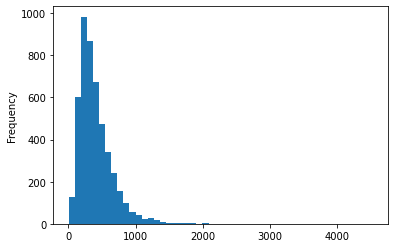

In [18]:
review['review'].str.split().map(lambda x : len(x)).plot.hist(bins=50)

In [19]:
from transformers import AutoTokenizer, AutoModel

In [20]:
from sentence_transformers import SentenceTransformer , models



word_embedding_model = models.Transformer( 'bert-large-uncased', max_seq_length = 512 ) #'allenai/scibert_scivocab_uncased' bert-large-uncased

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [21]:
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension() , pooling_mode_max_tokens= False , pooling_mode_mean_tokens=False , pooling_mode_mean_sqrt_len_tokens=True)
pooling_model2 = models.Pooling(word_embedding_model.get_word_embedding_dimension() , pooling_mode_max_tokens= False , pooling_mode_mean_tokens=False , pooling_mode_mean_sqrt_len_tokens=True) 

In [22]:
from torch import nn
dense_models = models.Dense(in_features=pooling_model.get_sentence_embedding_dimension(), out_features=768 , activation_function=nn.Tanh())

In [23]:
model = SentenceTransformer(modules = [ word_embedding_model , pooling_model])

In [24]:
embeddings = model.encode(sentences , batch_size=128 , convert_to_numpy = True , show_progress_bar = True)

Batches:   0%|          | 0/38 [00:00<?, ?it/s]

In [25]:
X = embeddings
y = np.array(review['confidence'].astype(int))

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size = 0.2 , stratify=np.array(review['confidence'].astype(str)))

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss' ,  patience=3)

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D,GlobalAveragePooling1D
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint
# fix random seed for reproducibility
np.random.seed(7)
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

In [29]:
import tensorflow as tf
model = Sequential()
model.add(Embedding( output_dim = 768, input_dim=768))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(rate=0.3))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError() , tf.keras.metrics.MeanAbsoluteError() ])
print(model.summary())
filepath="weights_best_cnn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val', verbose=1, save_best_only=True, mode='max',save_weights_only=True)
callbacks_list = [checkpoint,es]
model.fit(X,y, epochs=20, batch_size=16,verbose = 1,validation_data=(X_cv,y_cv), callbacks=callbacks_list)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 768)         589824    
                                                                 
 dense (Dense)               (None, None, 64)          49216     
                                                                 
 dense_1 (Dense)             (None, None, 32)          2080      
                                                                 
 dense_2 (Dense)             (None, None, 16)          528       
                                                                 
 dense_3 (Dense)             (None, None, 8)           136       
                                                                 
 global_average_pooling1d (G  (None, 8)                0         
 lobalAveragePooling1D)                                          
                                                        

In [30]:
predicted = model.predict(X_cv)

The rmse is 0.841617838602158
The mae is 0.7068908489763674
The r2 is -0.02737491467157871
Standard Deviation of predicted0.12557155
And for training values -------------------
The rmse is 0.8430242023869146
The mae is 0.7069939831303537
The r2 is -0.029637281586159414
Standard Deviation of predicted0.1271374


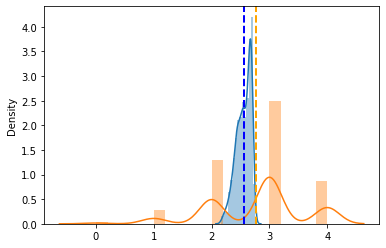

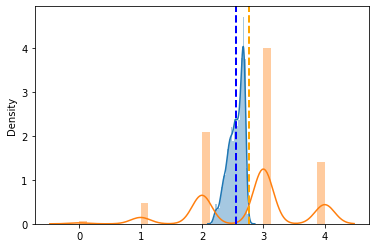

In [31]:
metrics(y_cv , predicted)
print("And for training values -------------------")
predicted2 = model.predict(X_train)
metrics(y_train , predicted2)